## CMPINF 2100 Week 13 | Introduction to Fitting Logistic Regression Models using scikit-learn

You will learn how to use the ARRAY interface for `statsmodels` as a preliminary for learning how to work with sklearn's predictive model functions.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

We will use a SIMPLIER example compared to the Week 12 Binary Clasification example data.

Let's go back to the Week 11 example which involed a SINGLE continuous input and a BINARY OUTCOME.

In [2]:
df = pd.read_csv('../week_11/week_11_intro_binary_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [4]:
df.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

### Fit Logistic Regression Models

#### Formula Interface

In [5]:
import statsmodels.formula.api as smf

In [6]:
fit_stats_formula = smf.logit(formula='y ~ x', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


In [7]:
fit_stats_formula.params

Intercept   -0.449518
x            1.183814
dtype: float64

In [8]:
fit_stats_formula.bse

Intercept    0.218009
x            0.267133
dtype: float64

In [9]:
fit_stats_formula.conf_int()

,0,1
Intercept,-0.876808,-0.022228
x,0.660243,1.707385


In [10]:
fit_stats_formula.pvalues

Intercept    0.039215
x            0.000009
dtype: float64

We know how to PREDICT a NEW data set to support visualization

In [11]:
input_grid = pd.DataFrame({'x': np.linspace(df.x.min()-0.02, df.x.max()+0.02, num=101)})

In [12]:
dfviz = input_grid.copy()

In [13]:
dfviz['pred_probability_statsformula'] = fit_stats_formula.predict( input_grid )

In [14]:
dfviz

,x,pred_probability_statsformula
0,-2.079272,0.051613
1,-2.033891,0.054307
2,-1.988509,0.057133
3,-1.943128,0.060097
4,-1.897747,0.063204
...,...,...
96,2.277334,0.904341
97,2.322715,0.908889
98,2.368097,0.913241
99,2.413478,0.917404


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


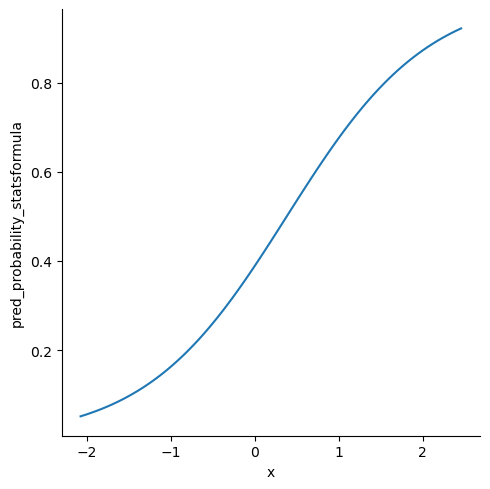

In [15]:
sns.relplot(data = dfviz, x='x', y='pred_probability_statsformula', kind='line')

plt.show()

We know how to CLASSIFY predictions by comparing the PREDICTED PROBABILITY to a THRESHOLD.

In [16]:
dfviz['pred_class_statsformula'] = np.where( dfviz.pred_probability_statsformula > 0.5, 1, 0 )

In [17]:
dfviz.pred_class_statsformula.value_counts()

pred_class_statsformula
0    55
1    46
Name: count, dtype: int64

### Array Interface

There is an alternative INTERFACE to statsmodels. This alternative does **NOT** rely on the formula!

Instead, we must provide arrays for the input FEATURES and for the OUTPUT.

This alternative interface is from the `statsmodels.api` module.

In [18]:
import statsmodels.api as sm

However, I never import `statsmodels.api` ALONE. It needs HELPERS from the `patsy` module. We need a function for GENERATING the FEATURE and OUTPUT arrays!

In [19]:
from patsy import dmatrices

In [20]:
from patsy import dmatrix

The `dmatrices()` function USSES a FORMULA to specify the FEATURES from the INPUT!

The `dmatrices()` function generates the OUTPUT array and the FEATURE array based on the provided FORMULA!

Historically the FEATURE array was called the **DESIGN MATRIX** and that's what the `d` in `dmatrices()` stands for.

The `dmatrices()` function RETURNS 2 objects.

`<output array>, <feature array> = dmatrices(<formula>, data= <data>)`

In [21]:
yobs_mat, Xdesign_mat = dmatrices('y ~ x', data = df)

In [22]:
type( yobs_mat)

patsy.design_info.DesignMatrix

But, these are nothing more than specialized NumPy arrays!

In [23]:
yobs_mat.ndim

2

In [24]:
Xdesign_mat.shape

(115, 2)

The output array has 1 column BUT 2 dimensions. But it is typically betteer to work with a 1D output array and so we must convert the 2D array to a 1D array using the `.ravel()`

In [25]:
yobs_mat[:5, :]

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [26]:
yobs_mat.ravel().shape

(115,)

In [27]:
Xdesign_mat[:5, :]

array([[ 1.        , -0.45742915],
       [ 1.        ,  0.42594754],
       [ 1.        , -0.7846951 ],
       [ 1.        , -1.92520922],
       [ 1.        ,  2.25261708]])

The reason why the FEATURE array has 2 columns is because there are 2 COEFFICIENTS estimated in this model!

In [28]:
fit_stats_formula.params

Intercept   -0.449518
x            1.183814
dtype: float64

The number of columns in the DESIGN MATRIX or FEATURE ARRAY is equal to the NUMBER of REGRESSION COEFFICIENTS that must be estimated!

Look at the zeroth column of the DESIGN MATRIX.

In [29]:
Xdesign_mat[:10, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
np.unique( Xdesign_mat[:, 0] )

array([1.])

The ZEROTH column of the DESIGN MATRIX or FEATURE ARRAY is special. 

The ZEROTH column ONLY contains the value 1.

The ZEROTH column is referred to as the BIAS column or the INTERCEPT column.

We typically wrote the formula for the AVERAGE OUTPUT as:

$$ \mu_n = \beta_0 + \beta_1 \times x_n $$

You can think of the INTERCEPT or BIAS column as a special constant FEATURE equal to 1 that multiplies the INTERCEPT.

$$ \mu_n = \beta_0 \times 1 + \beta_1 \times x_n $$


In [31]:
df

,x,y
0,-0.457429,1
1,0.425948,1
2,-0.784695,0
3,-1.925209,0
4,2.252617,1
...,...,...
110,-0.791672,0
111,0.452238,1
112,0.535510,1
113,-0.532739,0


In [32]:
Xdesign_mat[:5, ]

array([[ 1.        , -0.45742915],
       [ 1.        ,  0.42594754],
       [ 1.        , -0.7846951 ],
       [ 1.        , -1.92520922],
       [ 1.        ,  2.25261708]])

In [33]:
Xdesign_mat[-5:, ]

array([[ 1.        , -0.79167206],
       [ 1.        ,  0.45223789],
       [ 1.        ,  0.53551007],
       [ 1.        , -0.53273884],
       [ 1.        ,  0.3176613 ]])

The `dmatrices()` GENERATES the FEATURE values from the INPUTS as specified by the formula!

So if we wanted a more complicated set of FEATURES `dmatrices()` would create for us!

For example, let's create QUADRATIC feature from the input `x`.

In [34]:
y2, X2 = dmatrices('y ~ x + np.power(x, 2)', data=df)

In [35]:
X2[:5, ]

array([[ 1.        , -0.45742915,  0.20924143],
       [ 1.        ,  0.42594754,  0.18143131],
       [ 1.        , -0.7846951 ,  0.61574641],
       [ 1.        , -1.92520922,  3.70643052],
       [ 1.        ,  2.25261708,  5.07428369]])

In [36]:
df.x ** 2

0      0.209241
1      0.181431
2      0.615746
3      3.706431
4      5.074284
         ...   
110    0.626745
111    0.204519
112    0.286771
113    0.283811
114    0.100909
Name: x, Length: 115, dtype: float64

The `sm` module has FUNCTIONS to fit the models just likee `smf` BUT the SYNTAX is different.

The `sm` module names the functinos with a capital letter to distinguish from `smf`.

And you DO NOT use the formula, Instead, you provide the OUTPUT ARRAY and the FEATURE array.

The syntax for logistic regression looks like:

`sm.logit( <output array>, <feature array> ).fit()`

Fit the logistic regression model using the formula interface.

In [37]:
fit_stats_array = sm.Logit( yobs_mat.ravel(), Xdesign_mat).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


The array interface has the SAME attributes and methods as the formula interface!

In [38]:
fit_stats_array.params

array([-0.44951804,  1.1838136 ])

In [39]:
fit_stats_array.bse

array([0.218009  , 0.26713298])

In [40]:
fit_stats_array.conf_int()

array([[-0.87680783, -0.02222826],
       [ 0.66024258,  1.70738463]])

In [41]:
fit_stats_array.pvalues

array([3.92149476e-02, 9.35573925e-06])

In [42]:
fit_stats_formula.pvalues

Intercept    0.039215
x            0.000009
dtype: float64

In [43]:
fit_stats_formula.conf_int()

,0,1
Intercept,-0.876808,-0.022228
x,0.660243,1.707385


The formula inteerface returns PANDAS objects while the array interface returns NumPy objects.

To make predictions we MUST create the FEATURE array on the NEW data set!

In [44]:
input_grid

,x
0,-2.079272
1,-2.033891
2,-1.988509
3,-1.943128
4,-1.897747
...,...
96,2.277334
97,2.322715
98,2.368097
99,2.413478


We must create the FEATURE array for `input_grid` in order to MAKE PREDICTIONS!

In [45]:
ygrid, Xgrid = dmatrices('y ~ x', data=input_grid)

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y ~ x
    ^

The `dmatrices()` function creates the arrays when the OUTPUT is known or observed!

The `dmatrix()` function is used when you ONLY have the INPUTS and NOT the output!

You should use `dmatrix()` when you need to create the VISUALIZATION grid to visualize PREDICTIONS!

In [52]:
Xgrid = dmatrix(' ~ x', data=input_grid)

In [53]:
Xgrid.shape

(101, 2)

In [54]:
input_grid.shape

(101, 1)

In [55]:
Xdesign_mat.shape

(115, 2)

In [56]:
Xgrid[:5, :]

array([[ 1.        , -2.0792719 ],
       [ 1.        , -2.03389058],
       [ 1.        , -1.98850927],
       [ 1.        , -1.94312796],
       [ 1.        , -1.89774665]])

In [57]:
input_grid

,x
0,-2.079272
1,-2.033891
2,-1.988509
3,-1.943128
4,-1.897747
...,...
96,2.277334
97,2.322715
98,2.368097
99,2.413478


Let's add a new column to `dfviz` for the predicted event probability from the ARRAY interface.

In [58]:
dfviz['pred_probability_statsarray'] = fit_stats_array.predict( Xgrid )

In [59]:
dfviz

,x,pred_probability_statsformula,pred_class_statsformula,pred_probability_statsarray
0,-2.079272,0.051613,0,0.051613
1,-2.033891,0.054307,0,0.054307
2,-1.988509,0.057133,0,0.057133
3,-1.943128,0.060097,0,0.060097
4,-1.897747,0.063204,0,0.063204
...,...,...,...,...
96,2.277334,0.904341,1,0.904341
97,2.322715,0.908889,1,0.908889
98,2.368097,0.913241,1,0.913241
99,2.413478,0.917404,1,0.917404


### Formula vs Array Interface

I never use the statsmodels array interface. The formula interface is FASTER to work with, You do NOT need to create the array objects for training OR for making predictions!

Plus, you get to use the nice NAMES for everything. The regression coeffients are automatically named consistent with the features they multiply when you use the formula interface!

HOWEVER... we introduced the array interface here... because scikit-learn DOES NOT work with formulas! scikit-learn has its own set of PREDICTIVE MODEL functions! scikit-learn can fit linear models for regression and logistic regression models for classification BUT you must prove the ouput and feature arrays to scikit-learn!

#### scikit-learn

The logistic regression function from scikit-learn is imported below.

In [60]:
from sklearn.linear_model import LogisticRegression

If you were working with a linear model for regression... you would instead import:

In [61]:
from sklearn.linear_model import LinearRegression

Scikit-learn PREDICTIVE MODEL functions follow the SAME workflow as the PREPROCESSING functinos we worked with earlier in the semester!

The object must be INITIALIZED and then the object is FIT.

Once the model is FIT then you can PREDICT or MEASURE PERFORMANCE.

### Default and Conventional Usage

Remember when the scikit-learn object is INITIALIZED this is where we set the ASSUMPTIONS of the model.

Let's first use the DEFAULT assumptions.

We will also use the conventional or typical usage for the FEATURES.

The conventional approach when fitting predictive models with scikit-learn is to REMOVE the BIAS or INTERCEPT column of 1s!

In [62]:
Xdesign_mat[:5, :]

array([[ 1.        , -0.45742915],
       [ 1.        ,  0.42594754],
       [ 1.        , -0.7846951 ],
       [ 1.        , -1.92520922],
       [ 1.        ,  2.25261708]])

We can remove the INTERCEPT or BIAS column by including `'-1'` in the formula definition

In [63]:
'y ~ x'

'y ~ x'

In [64]:
'y ~ x -1'

'y ~ x -1'

Use `dmatrices()` to create the arrays for the default and conventional sklearn formulation.

In [65]:
y_sk_default, X_sk_default = dmatrices( 'y ~ x - 1', data=df)

In [66]:
X_sk_default.shape

(115, 1)

In [67]:
X_sk_default[:5, :]

array([[-0.45742915],
       [ 0.42594754],
       [-0.7846951 ],
       [-1.92520922],
       [ 2.25261708]])

In [68]:
y_sk_default.ravel()

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])

Let's now INITIALIZE and then FIT the sklearn logistic regreession model.

The syntax is VERY DIFFERENT from `statsmodels`.

The data are provided in the `.fit()` call RATHER than in the INITIALIZATION step as with `statsmodels`.

In [69]:
sk_default_typical = LogisticRegression().fit( X_sk_default, y_sk_default.ravel() )

scikit-learn logistic reegression models have their OWN set of attributes and methods which are DIFFERENT from `statsmodels`.

In [70]:
dir( sk_default_typical )

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',

The scikit-learn logistic regression model does **NOT** provide whether the features are statistically significant!

The coefficient estimates are available in the `.coef_` attribute.

In [71]:
fit_stats_formula.params

Intercept   -0.449518
x            1.183814
dtype: float64

In [72]:
sk_default_typical.coef_

array([[1.10749129]])

In [73]:
sk_default_typical.intercept_

array([-0.43772033])

### Do NOT fit the intercept

Let's change the ASSUMPTIONS and the FEATURE array so that sklearn estimates the INTERCEPT as if it's a regular coefficient. 

We are essentially TRICKING sklearn.

We are doing this so we can have apples-to-apples comparison with statsmodels.

But... you should also do this when you have CATEGORICAL INPUTS! Next week, we will wrap up the semester by discussing just why this is the case!

Here's how we can force the INTERCEPT to be estimated as if it's a "regular" coefficient.

You NEED the INTERCEPT or BIAS column in the FEATURE array!

In [74]:
Xdesign_mat[:5, :]

array([[ 1.        , -0.45742915],
       [ 1.        ,  0.42594754],
       [ 1.        , -0.7846951 ],
       [ 1.        , -1.92520922],
       [ 1.        ,  2.25261708]])

The next piece you MUST set `fit_intercept=False` when you INITIALIZE the object!

Let's use all other settings at their default values.

In [75]:
sk_default = LogisticRegression(fit_intercept=False).fit( Xdesign_mat, yobs_mat.ravel() )

The INTERCEPT attribute is now set to ZERO!

In [76]:
sk_default.intercept_

array([0.])

The INTERCEPT is now contained with the SLOPE in the `.coef_` attribute.

In [77]:
sk_default.coef_

array([[-0.41847455,  1.10362554]])

In [78]:
sk_default.coef_.ndim

2

In [79]:
sk_default.coef_.shape

(1, 2)

In [80]:
sk_default.coef_.ravel()

array([-0.41847455,  1.10362554])

This allows us to directly compare the SKLEARN coefficient estimates with the statsmodels estimates.

In [81]:
fit_stats_array.params

array([-0.44951804,  1.1838136 ])

In [82]:
pd.Series(fit_stats_array.params, index=fit_stats_formula.params.index)

Intercept   -0.449518
x            1.183814
dtype: float64

In [83]:
fit_compare = pd.DataFrame({'statsmodels_formula': fit_stats_formula.params,
                            'statsmodels_array': pd.Series(fit_stats_array.params, index=fit_stats_formula.params.index),
                            'sklearn_default': pd.Series( sk_default.coef_.ravel(), index=fit_stats_formula.params.index)})

In [84]:
fit_compare

,statsmodels_formula,statsmodels_array,sklearn_default
Intercept,-0.449518,-0.449518,-0.418475
x,1.183814,1.183814,1.103626


The sklearn estimates are **DIFFERENT** from statsmodels!

SKLEARN is NOT more correct than statsmodels.

statsmodels is NOT more correct than SKLEARN!

They are soving DIFFERENT problems by default!

We will discuss the differences next week.

For now, I want you to know how to force sklearn to beehave like statsmodels!

The reason they are different is because SKLEARN is trying to PREVENT extreme coefficient estimates. It does so by using something called the PENALTY!

### Turn off the penalty to match statsmodels

Pleasse note, you DO NOT need to do this with `LinearRegression()` function in sklearn. This is something specific to `LogisticRegression()` in SKLEARN

In [85]:
sk_default.penalty

'l2'

We want to FORCE the penalty to be NONE. A NONE penalty means the coefficients are estimated in order to MINIMIZE a LOSS!

Think of it as finding the coefficients that MINIMIZE the ERROR!

That's why I feel SKLEARN is VERY DANGEROUS when you use the DEFAULTS because it is EASY to forget what the DEFAULTS are!

I alway recommend SPECIFYING the `penalty` argument and the `solver` argument so you KNOW exactly how the coefficients were estimated!

We will therefore force SKLEARN to MINIMIZE the LOSS JUST LIKE statsmodels! And will have the INTERCEPT estimated as if it's a 'regular' coefficient.

In [86]:
sk_min_loss = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=False).fit( Xdesign_mat, yobs_mat.ravel() )

In [87]:
sk_min_loss.penalty

In [88]:
sk_min_loss.coef_

array([[-0.44951919,  1.18381652]])

Let's compare the estimated coefficients with statsmodels!

In [89]:
fit_compare['sklearn_none'] = pd.Series( sk_min_loss.coef_.ravel() , index=fit_compare.index)

In [90]:
fit_compare

,statsmodels_formula,statsmodels_array,sklearn_default,sklearn_none
Intercept,-0.449518,-0.449518,-0.418475,-0.449519
x,1.183814,1.183814,1.103626,1.183817


The esstimates are NOT perfectly identical. But, they match down to 4 to 5 decimal points!

We have therefore converted sklearn to behave very, very similar to statsmodels!

### Why use sklearn?

#### Downsides to sklearn

SKLEARN does NOT provide standard errors! It only provides coefficient estimates!

We therefore CANNOT identify statistically significant coefficients and thus features!

We cannot identify the CONFIDENCE INTERVAL on trends from sklearn!

#### Upsides to sklearn

Sklearn is focused on calculating PERFORMANCE metrics!

It has a dedicated method `.score()` for **SCORING** or GRADING or MEASURING the performance!

Let's calculate the training set Accuracy for statsmodels.

In [91]:
df_copy = df.copy()

In [92]:
df_copy['pred_probability'] = fit_stats_formula.predict( df )

In [93]:
df_copy['pred_class'] = np.where( df_copy.pred_probability > 0.5, 1, 0 )

In [94]:
np.mean( df_copy.pred_class  == df_copy.y )

0.6782608695652174

The `.score()` for `LogisticRegression()` calculates the ACCURACY by default!

It ASSUMES a DEFAULT threshold of 0.5!

In [95]:
sk_min_loss.score( Xdesign_mat, yobs_mat.ravel() )

0.6782608695652174

### Predictions with sklearn

The `.predict()` method returns the CLASSIFICATION assuming a 0.5 threshold!

The `.predict()` method REQUIRES the FEATURE ARRAY!

In [96]:
Xgrid[:5, :]

array([[ 1.        , -2.0792719 ],
       [ 1.        , -2.03389058],
       [ 1.        , -1.98850927],
       [ 1.        , -1.94312796],
       [ 1.        , -1.89774665]])

In [97]:
dfviz['pred_class_sklearn_none'] = sk_min_loss.predict( Xgrid )

In [98]:
dfviz

,x,pred_probability_statsformula,pred_class_statsformula,pred_probability_statsarray,pred_class_sklearn_none
0,-2.079272,0.051613,0,0.051613,0.0
1,-2.033891,0.054307,0,0.054307,0.0
2,-1.988509,0.057133,0,0.057133,0.0
3,-1.943128,0.060097,0,0.060097,0.0
4,-1.897747,0.063204,0,0.063204,0.0
...,...,...,...,...,...
96,2.277334,0.904341,1,0.904341,1.0
97,2.322715,0.908889,1,0.908889,1.0
98,2.368097,0.913241,1,0.913241,1.0
99,2.413478,0.917404,1,0.917404,1.0


In [99]:
dfviz.pred_class_sklearn_none.value_counts()

pred_class_sklearn_none
0.0    55
1.0    46
Name: count, dtype: int64

In [100]:
dfviz.pred_class_statsformula.value_counts()

pred_class_statsformula
0    55
1    46
Name: count, dtype: int64

To get the PROBABILITY of the EVENT we need to use the `.predict_proba()` method. However, this method does NOT return the EVENT PROBABILITY.

In [101]:
pred_grid_sk = sk_min_loss.predict_proba( Xgrid )

In [102]:
pred_grid_sk.shape

(101, 2)

In [103]:
pred_grid_sk[:5, :]

array([[0.94838732, 0.05161268],
       [0.94569339, 0.05430661],
       [0.94286732, 0.05713268],
       [0.93990353, 0.06009647],
       [0.9367963 , 0.0632037 ]])

The CLASS orderings are provided by the `.classes_` attribute.

In [104]:
sk_min_loss.classes_

array([0., 1.])

We need to provide a conditional test to find out which column is the EVENT PROBABILITY.

In [105]:
pred_grid_sk[:5, sk_min_loss.classes_ == 1]

array([[0.05161268],
       [0.05430661],
       [0.05713268],
       [0.06009647],
       [0.0632037 ]])

In [106]:
pred_grid_sk[:, sk_min_loss.classes_ == 1].shape

(101, 1)

In [107]:
pred_grid_sk[:, sk_min_loss.classes_ == 1].ravel().shape

(101,)

In [108]:
dfviz['pred_probability_sklearn_none'] = pd.Series( pred_grid_sk[:, sk_min_loss.classes_ == 1].ravel() , index=dfviz.index)

In [109]:
dfviz

,x,pred_probability_statsformula,pred_class_statsformula,pred_probability_statsarray,pred_class_sklearn_none,pred_probability_sklearn_none
0,-2.079272,0.051613,0,0.051613,0.0,0.051613
1,-2.033891,0.054307,0,0.054307,0.0,0.054307
2,-1.988509,0.057133,0,0.057133,0.0,0.057133
3,-1.943128,0.060097,0,0.060097,0.0,0.060096
4,-1.897747,0.063204,0,0.063204,0.0,0.063204
...,...,...,...,...,...,...
96,2.277334,0.904341,1,0.904341,1.0,0.904342
97,2.322715,0.908889,1,0.908889,1.0,0.908889
98,2.368097,0.913241,1,0.913241,1.0,0.913242
99,2.413478,0.917404,1,0.917404,1.0,0.917405


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


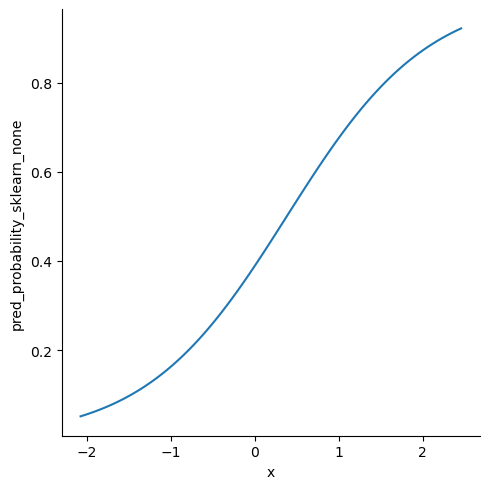

In [110]:
sns.relplot(data=dfviz, x='x', y='pred_probability_sklearn_none', kind='line')

plt.show()